In [5]:
import pandas as pd
import numpy as np

In [2]:
def loadData(filePath):
    with open(filePath) as f:
        data = f.read().split('\n')
    elements = []
    for line in data:
        el = line.split()
        try:
            elements.append([el[0],el[4], ' '.join(el[7:])])
        except:
            pass
    
    #Build Dataframe
    df = pd.DataFrame(elements, columns=['timestamp','AP','message'])
    df.drop_duplicates(inplace=True)
    
    df['Disassociating'] = df.message.str.extract(r'Disassociating (\w+)', expand=False)
    df['Station'] = df.message.str.extract(r'Station (\w+)', expand=False)
    df['Action'] = df.message.str.extract(r'Station \w+ (\w+)', expand=False)
    
    df.ix[ ~ df.Disassociating.isnull(),'Station'] = df.ix[ ~ df.Disassociating.isnull(),'Disassociating']
    df.ix[ ~ df.Disassociating.isnull(),'Action'] = 'Disassociating'
    
    df['Deauthenticating'] = df.message.str.extract(r'Deauthenticating (\w+)', expand=False)
    df.ix[ ~ df.Deauthenticating.isnull(),'Station'] = df.ix[ ~ df.Deauthenticating.isnull(),'Deauthenticating']
    df.ix[ ~ df.Deauthenticating.isnull(),'Action'] = 'Deauthenticating'
    
    df.drop(['Disassociating','Deauthenticating'], axis=1, inplace=True)
    
    
    df['BuildingType'] = df.AP.str.extract(r'(\w+)Bldg', expand=False)
    df['BuildingNumber'] = df.AP.str.extract(r'Bldg(\d+)', expand=False)
    df['APnumber'] = df.AP.str.extract(r'AP(\d+)', expand=False)
    df['BuildingId'] = df.BuildingType + df.BuildingNumber
    return df

In [16]:
fname = "/home/michael/Documents/syslog-v3.3/20010411.log"
df = loadData(fname)

In [17]:
df.head()

,timestamp,AP,message,Station,Action,BuildingType,BuildingNumber,APnumber,BuildingId
0,986990216,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
1,986990247,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
2,986990247,AdmBldg19AP3,Station 0040961e58be Associated,0040961e58be,Associated,Adm,19,3,Adm19
3,986990293,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
4,986990364,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19


In [18]:
df['timestamp'] = pd.to_datetime(df.timestamp, unit='s')

In [21]:
df.head()

,timestamp,AP,message,Station,Action,BuildingType,BuildingNumber,APnumber,BuildingId
0,2001-04-11 11:56:56,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
1,2001-04-11 11:57:27,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
2,2001-04-11 11:57:27,AdmBldg19AP3,Station 0040961e58be Associated,0040961e58be,Associated,Adm,19,3,Adm19
3,2001-04-11 11:58:13,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
4,2001-04-11 11:59:24,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19


In [23]:
df.index = df.timestamp

In [24]:
df.head()

,timestamp,AP,message,Station,Action,BuildingType,BuildingNumber,APnumber,BuildingId
timestamp,,,,,,,,,
2001-04-11 11:56:56,2001-04-11 11:56:56,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
2001-04-11 11:57:27,2001-04-11 11:57:27,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
2001-04-11 11:57:27,2001-04-11 11:57:27,AdmBldg19AP3,Station 0040961e58be Associated,0040961e58be,Associated,Adm,19,3,Adm19
2001-04-11 11:58:13,2001-04-11 11:58:13,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
2001-04-11 11:59:24,2001-04-11 11:59:24,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19


In [29]:
df['2001-04-11 12:00:00':'2001-04-11 13:00:00']

,timestamp,AP,message,Station,Action,BuildingType,BuildingNumber,APnumber,BuildingId
timestamp,,,,,,,,,
2001-04-11 12:01:24,2001-04-11 12:01:24,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
2001-04-11 12:16:44,2001-04-11 12:16:44,AdmBldg16AP1,"Stopped driver for port ""fec0""",NaN,NaN,Adm,16,1,Adm16
2001-04-11 12:16:44,2001-04-11 12:16:44,AdmBldg16AP1,"Started driver for port ""fec0""",NaN,NaN,Adm,16,1,Adm16
2001-04-11 12:16:44,2001-04-11 12:16:44,AdmBldg16AP1,"Bound ""AWC Packet Router"" protocol to device ""...",NaN,NaN,Adm,16,1,Adm16
2001-04-11 12:16:44,2001-04-11 12:16:44,AdmBldg16AP1,"Bound ""AWC Packet Router"" protocol to device ""...",NaN,NaN,Adm,16,1,Adm16
2001-04-11 12:16:44,2001-04-11 12:16:44,AdmBldg16AP1,"Bound ""AWC DDP Protocol"" protocol to device ""f...",NaN,NaN,Adm,16,1,Adm16
2001-04-11 12:16:44,2001-04-11 12:16:44,AdmBldg16AP1,"Bound ""AWC 802.11 MAC-Level Management"" protoc...",NaN,NaN,Adm,16,1,Adm16
2001-04-11 12:16:44,2001-04-11 12:16:44,AdmBldg16AP1,"Bound ""AWC 802.11 MAC-Level Control"" protocol ...",NaN,NaN,Adm,16,1,Adm16
2001-04-11 12:16:44,2001-04-11 12:16:44,AdmBldg16AP1,"Bound ""802.1X Protocol"" protocol to device ""awc0""",NaN,NaN,Adm,16,1,Adm16


In [39]:
df.ix[df.Station=='0040961e58be']

,timestamp,AP,message,Station,Action,BuildingType,BuildingNumber,APnumber,BuildingId
timestamp,,,,,,,,,
2001-04-11 11:56:56,2001-04-11 11:56:56,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
2001-04-11 11:57:27,2001-04-11 11:57:27,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
2001-04-11 11:57:27,2001-04-11 11:57:27,AdmBldg19AP3,Station 0040961e58be Associated,0040961e58be,Associated,Adm,19,3,Adm19
2001-04-11 11:58:13,2001-04-11 11:58:13,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
2001-04-11 11:59:24,2001-04-11 11:59:24,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
2001-04-11 12:01:24,2001-04-11 12:01:24,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
2001-04-11 12:18:10,2001-04-11 12:18:10,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
2001-04-11 12:18:52,2001-04-11 12:18:52,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19
2001-04-11 12:18:52,2001-04-11 12:18:52,AdmBldg19AP3,Station 0040961e58be Associated,0040961e58be,Associated,Adm,19,3,Adm19


### counting events

In [41]:
len(df.ix[ ~df.Station.isnull()])

9078

In [42]:
df.ix[ ~df.Station.isnull(), 'Ap_Station_Link'] = 1

In [43]:
df.head()

,timestamp,AP,message,Station,Action,BuildingType,BuildingNumber,APnumber,BuildingId,Ap_Station_Link
timestamp,,,,,,,,,,
2001-04-11 11:56:56,2001-04-11 11:56:56,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19,1.0
2001-04-11 11:57:27,2001-04-11 11:57:27,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19,1.0
2001-04-11 11:57:27,2001-04-11 11:57:27,AdmBldg19AP3,Station 0040961e58be Associated,0040961e58be,Associated,Adm,19,3,Adm19,1.0
2001-04-11 11:58:13,2001-04-11 11:58:13,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19,1.0
2001-04-11 11:59:24,2001-04-11 11:59:24,AdmBldg19AP3,Station 0040961e58be Authenticated,0040961e58be,Authenticated,Adm,19,3,Adm19,1.0


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

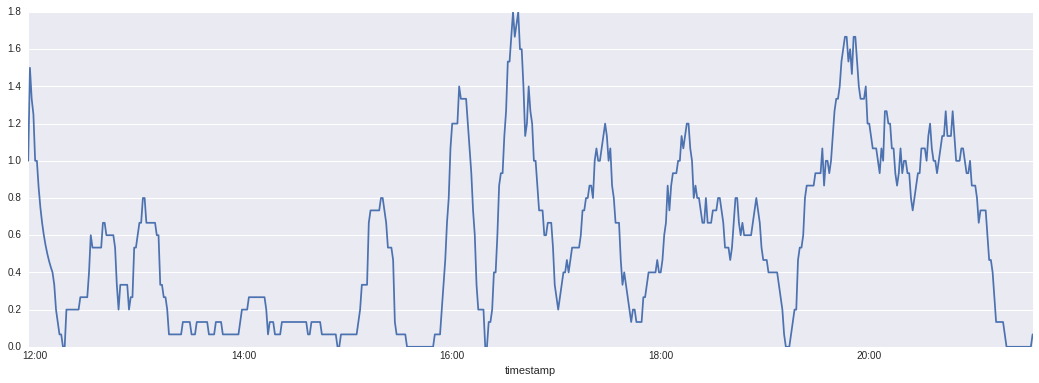

In [65]:
plt.figure(figsize=(18,6))
a = df.ix[df.Station=='0040961e58be'].Ap_Station_Link.resample('1Min').sum().fillna(0)
a.rolling('15Min').mean().plot()
plt.show()

In [73]:
stations = list(set(df.ix[~df.Station.isnull(),'Station']))

In [133]:
activities = pd.DataFrame()
activities['all'] = df.Ap_Station_Link.resample('1Min').min().fillna(0).rolling('15Min').mean()
for s in stations:
    activities[s] = df.ix[df.Station==s].Ap_Station_Link.resample('1Min').sum().fillna(0).rolling('15Min').mean()
activities.fillna(0,inplace=True)

In [95]:
activities.head()

,all,003065343950,004096daa8fe,00306526784b,0040961e58be,004096342c16,00022db6cc78,00409664173d,003065d55e08,00409699915b,...,003065b40dda,004096ff6784,0040968cf0ea,0030650c0321,00601db0635a,00409622cb2b,004096d06bb2,0030655b9345,00409630cdc9,00306506fde2
timestamp,,,,,,,,,,,,,,,,,,,,,
2001-04-11 11:56:00,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-04-11 11:57:00,1.500000,0.0,0.0,0.0,1.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-04-11 11:58:00,1.333333,0.0,0.0,0.0,1.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-04-11 11:59:00,1.250000,0.0,0.0,0.0,1.250000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-04-11 12:00:00,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


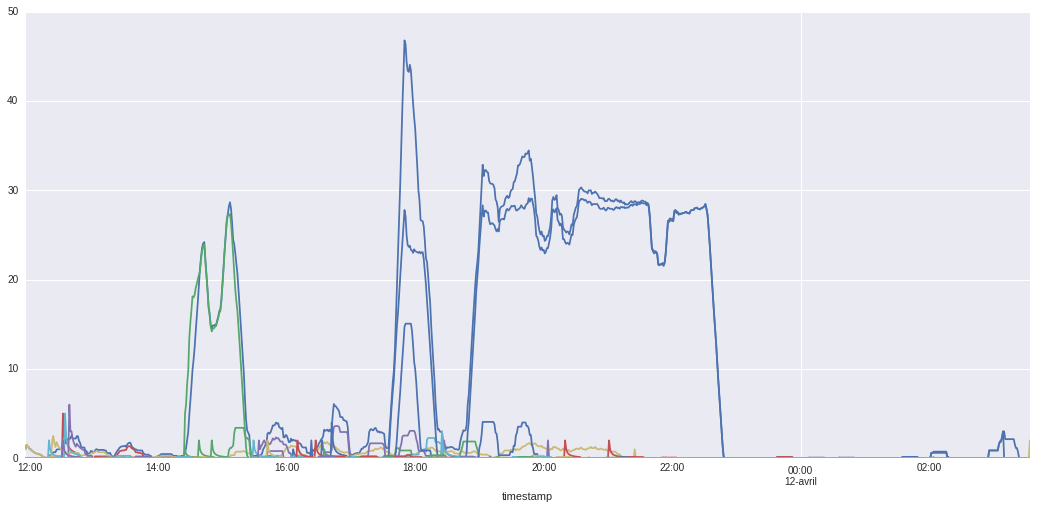

In [100]:
activities.plot(figsize=(18,8), legend=False)
plt.show()

Some stations are working in groups

In [106]:
activities.max()

all             46.800000
003065343950     2.000000
004096daa8fe     5.000000
00306526784b     2.000000
0040961e58be     1.800000
004096342c16     5.000000
00022db6cc78     2.000000
00409664173d     3.400000
003065d55e08     2.000000
00409699915b     6.000000
00409649fe8d     1.000000
003065fc1494     2.000000
004096da8a8e    15.066667
004096a0b921    27.333333
003065e8f0ca     2.000000
003065708c70     2.000000
00409699dfba     2.500000
00601d9bf252     3.000000
0040962dc86b    29.133333
003065b40dda     2.000000
004096ff6784     2.000000
0040968cf0ea     2.333333
0030650c0321     2.000000
00601db0635a     2.000000
00409622cb2b     2.000000
004096d06bb2     1.000000
0030655b9345     2.000000
00409630cdc9     2.000000
00306506fde2     2.000000
dtype: float64

In [102]:
df.ix[df.Station == '0040962dc86b']

,timestamp,AP,message,Station,Action,BuildingType,BuildingNumber,APnumber,BuildingId,Ap_Station_Link
timestamp,,,,,,,,,,
2001-04-11 16:06:05,2001-04-11 16:06:05,AcadBldg16AP3,"Deauthenticating 0040962dc86b, reason ""Inactiv...",0040962dc86b,Deauthenticating,Acad,16,3,Acad16,1.0
2001-04-11 17:36:07,2001-04-11 17:36:07,AcadBldg16AP4,Station 0040962dc86b Authenticated,0040962dc86b,Authenticated,Acad,16,4,Acad16,1.0
2001-04-11 17:36:08,2001-04-11 17:36:08,AcadBldg16AP4,"Disassociating 0040962dc86b, reason ""Not Assoc...",0040962dc86b,Disassociating,Acad,16,4,Acad16,1.0
2001-04-11 17:36:08,2001-04-11 17:36:08,AcadBldg16AP4,Station 0040962dc86b Authenticated,0040962dc86b,Authenticated,Acad,16,4,Acad16,1.0
2001-04-11 17:36:11,2001-04-11 17:36:11,AcadBldg16AP3,Station 0040962dc86b Authenticated,0040962dc86b,Authenticated,Acad,16,3,Acad16,1.0
2001-04-11 17:36:13,2001-04-11 17:36:13,AcadBldg16AP2,Station 0040962dc86b Authenticated,0040962dc86b,Authenticated,Acad,16,2,Acad16,1.0
2001-04-11 17:36:13,2001-04-11 17:36:13,AcadBldg16AP2,"Disassociating 0040962dc86b, reason ""Not Assoc...",0040962dc86b,Disassociating,Acad,16,2,Acad16,1.0
2001-04-11 17:36:15,2001-04-11 17:36:15,AcadBldg16AP3,Station 0040962dc86b Authenticated,0040962dc86b,Authenticated,Acad,16,3,Acad16,1.0
2001-04-11 17:36:17,2001-04-11 17:36:17,AcadBldg16AP4,Station 0040962dc86b Authenticated,0040962dc86b,Authenticated,Acad,16,4,Acad16,1.0


The high connection activity is due to the overlapping AP ranges. The station is authenticating concurently to all tha APs in the building.

In [103]:
set(df.Action)

{nan,
 'Associated',
 'Authenticated',
 'Deauthenticating',
 'Disassociating',
 'Reassociated',
 'roamed'}

In [105]:
df.ix[(df.Station == '0040962dc86b') & (df.Action == 'Associated')]

,timestamp,AP,message,Station,Action,BuildingType,BuildingNumber,APnumber,BuildingId,Ap_Station_Link
timestamp,,,,,,,,,,
2001-04-11 22:34:30,2001-04-11 22:34:30,AcadBldg16AP3,Station 0040962dc86b Associated,0040962dc86b,Associated,Acad,16,3,Acad16,1.0


We may have to normalise the activity by the number of APs in the time window.

In [107]:
df.ix[df.Station == '004096da8a8e']

,timestamp,AP,message,Station,Action,BuildingType,BuildingNumber,APnumber,BuildingId,Ap_Station_Link
timestamp,,,,,,,,,,
2001-04-11 16:42:20,2001-04-11 16:42:20,AcadBldg16AP4,Station 004096da8a8e Authenticated,004096da8a8e,Authenticated,Acad,16,4,Acad16,1.0
2001-04-11 16:42:22,2001-04-11 16:42:22,AcadBldg16AP2,Station 004096da8a8e Authenticated,004096da8a8e,Authenticated,Acad,16,2,Acad16,1.0
2001-04-11 16:42:24,2001-04-11 16:42:24,AcadBldg16AP2,Station 004096da8a8e roamed,004096da8a8e,roamed,Acad,16,2,Acad16,1.0
2001-04-11 16:42:24,2001-04-11 16:42:24,AcadBldg16AP4,Station 004096da8a8e roamed,004096da8a8e,roamed,Acad,16,4,Acad16,1.0
2001-04-11 17:42:34,2001-04-11 17:42:34,AcadBldg16AP4,Station 004096da8a8e Authenticated,004096da8a8e,Authenticated,Acad,16,4,Acad16,1.0
2001-04-11 17:42:36,2001-04-11 17:42:36,AcadBldg16AP3,Station 004096da8a8e Authenticated,004096da8a8e,Authenticated,Acad,16,3,Acad16,1.0
2001-04-11 17:42:39,2001-04-11 17:42:39,AcadBldg16AP3,Station 004096da8a8e Authenticated,004096da8a8e,Authenticated,Acad,16,3,Acad16,1.0
2001-04-11 17:42:41,2001-04-11 17:42:41,AcadBldg16AP4,Station 004096da8a8e Authenticated,004096da8a8e,Authenticated,Acad,16,4,Acad16,1.0
2001-04-11 17:42:43,2001-04-11 17:42:43,AcadBldg16AP2,Station 004096da8a8e Authenticated,004096da8a8e,Authenticated,Acad,16,2,Acad16,1.0


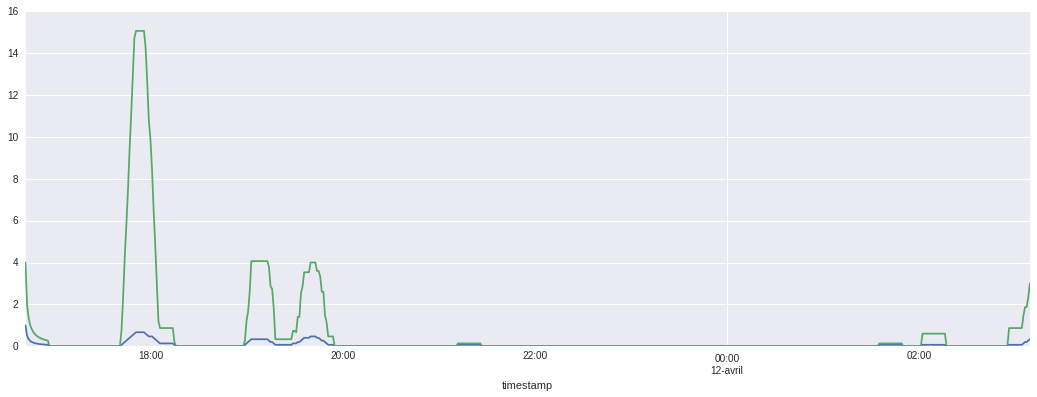

In [126]:
plt.figure(figsize=(18,6))
a = df.ix[df.Station=='004096da8a8e'].Ap_Station_Link.resample('1Min').sum().fillna(0)
b = df.ix[df.Station=='004096da8a8e'].APnumber.resample('1Min').count().fillna(0)
c = a/b
c.fillna(0).rolling('15Min').mean().plot()
a.fillna(0).rolling('15Min').mean().plot()
plt.show()

the signals are normalized.

In [235]:
activities = pd.DataFrame()
activities['all'] = df.Ap_Station_Link.resample('1Min').sum().fillna(0).rolling('15Min').mean()
for s in stations:
    a = df.ix[df.Station==s].Ap_Station_Link.resample('1Min').sum().fillna(0)
    b = df.ix[df.Station==s].APnumber.resample('1Min').count().fillna(0)
    c = a/b
    activities[s] =  c.fillna(0).rolling('15Min').mean()
    
activities.fillna(0,inplace=True)
activities.drop('all', 1, inplace=True)

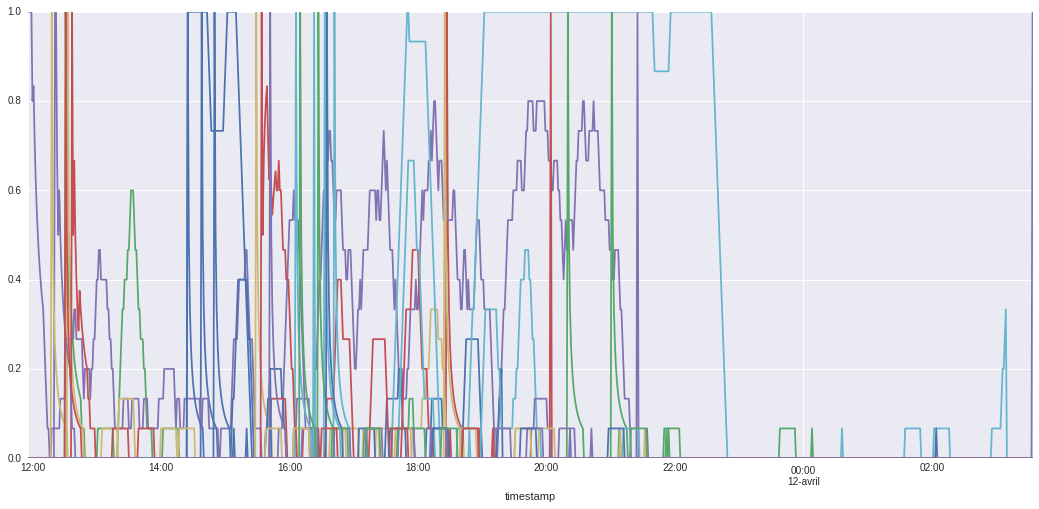

In [236]:
activities.plot(figsize=(18,8), legend=False)
plt.show()

In [230]:
activities.max()

003065343950    1.0
004096daa8fe    1.0
00306526784b    1.0
0040961e58be    1.0
004096342c16    1.0
00022db6cc78    1.0
00409664173d    1.0
003065d55e08    1.0
00409699915b    1.0
00409649fe8d    1.0
003065fc1494    1.0
004096da8a8e    1.0
004096a0b921    1.0
003065e8f0ca    1.0
003065708c70    1.0
00409699dfba    1.0
00601d9bf252    1.0
0040962dc86b    1.0
003065b40dda    1.0
004096ff6784    1.0
0040968cf0ea    1.0
0030650c0321    1.0
00601db0635a    1.0
00409622cb2b    1.0
004096d06bb2    1.0
0030655b9345    1.0
00409630cdc9    1.0
00306506fde2    1.0
dtype: float64

We need to exclude the cummulative signal for all stations for the representation.

In [141]:
activities.ix[:,activities.columns != 'all'].head()

,003065343950,004096daa8fe,00306526784b,0040961e58be,004096342c16,00022db6cc78,00409664173d,003065d55e08,00409699915b,00409649fe8d,...,003065b40dda,004096ff6784,0040968cf0ea,0030650c0321,00601db0635a,00409622cb2b,004096d06bb2,0030655b9345,00409630cdc9,00306506fde2
timestamp,,,,,,,,,,,,,,,,,,,,,
2001-04-11 11:56:00,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-04-11 11:57:00,0.0,0.0,0.0,1.500000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-04-11 11:58:00,0.0,0.0,0.0,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-04-11 11:59:00,0.0,0.0,0.0,1.250000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-04-11 12:00:00,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


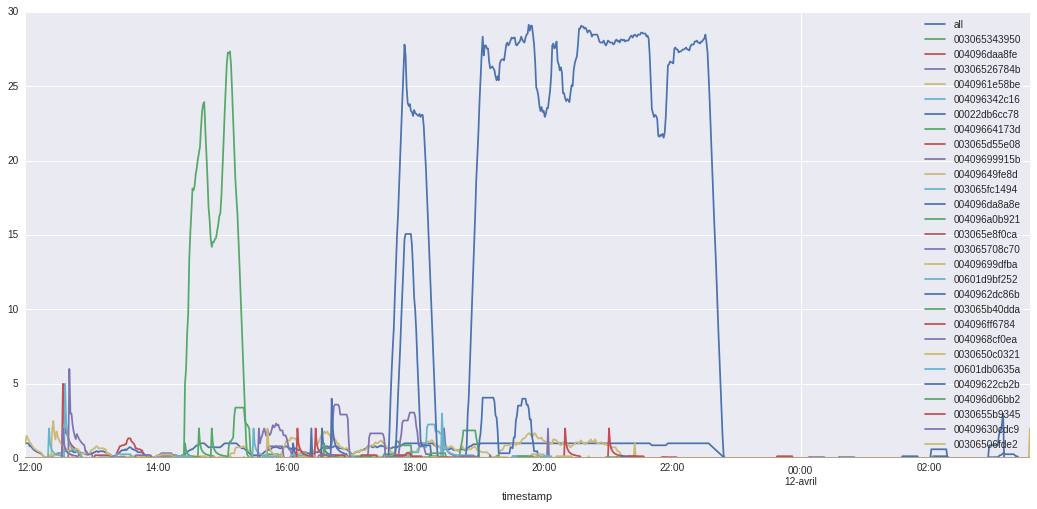

In [145]:
activities.plot(figsize=(18,8), legend=True)
plt.show()

## Split per building

In [149]:
bldg = list(set(df.BuildingType))
bldg.sort()
bldg

['Acad', 'Adm', 'Lib', 'Soc']

In [249]:
building_list = []
for i,buld in enumerate(bldg):
    building_list.append(pd.DataFrame())
    
    building_list[i]['all'] = df.Ap_Station_Link.resample('1Min').sum().fillna(0).rolling('15Min').mean()    
    for s in stations:
        a = df.ix[np.asarray(df.BuildingType == buld) & np.asarray(df.Station == s)].Ap_Station_Link.resample('1Min').sum().fillna(0)
        b = df.ix[np.asarray(df.BuildingType == buld) & np.asarray(df.Station == s)].APnumber.resample('1Min').count().fillna(0)
        c = a/b
        building_list[i][s] = c.fillna(0).rolling('15Min').mean()
    building_list[i].fillna(0, inplace=True)
    building_list[i].drop('all', 1, inplace=True)

In [250]:
building_list[0].head()

,003065343950,004096daa8fe,00306526784b,0040961e58be,004096342c16,00022db6cc78,00409664173d,003065d55e08,00409699915b,00409649fe8d,...,003065b40dda,004096ff6784,0040968cf0ea,0030650c0321,00601db0635a,00409622cb2b,004096d06bb2,0030655b9345,00409630cdc9,00306506fde2
timestamp,,,,,,,,,,,,,,,,,,,,,
2001-04-11 11:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-04-11 11:57:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-04-11 11:58:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-04-11 11:59:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-04-11 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


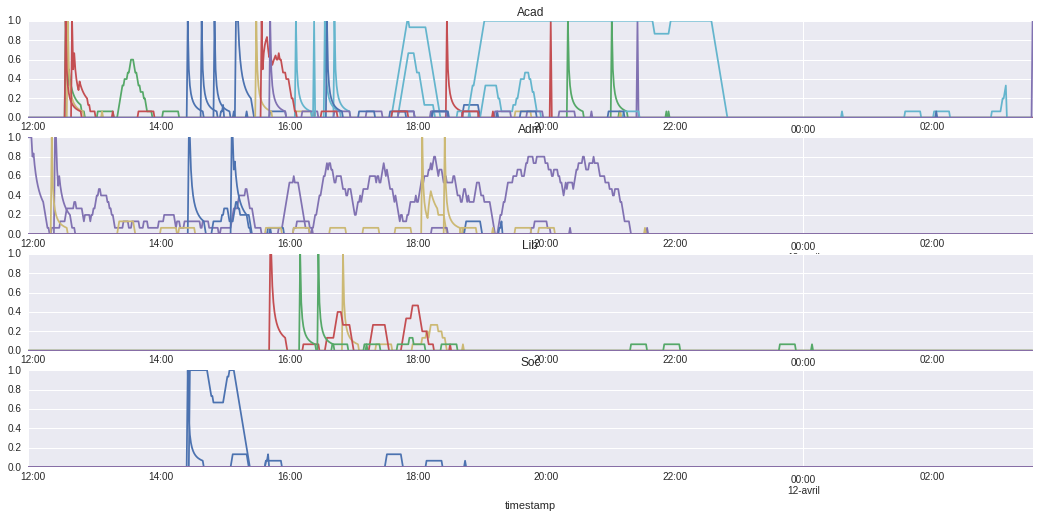

In [251]:
fig, axes = plt.subplots(nrows=4, ncols=1)
for i,b in enumerate(building_list):
    b.plot(ax=axes[i],figsize=(18,8), legend=False)
    axes[i].set_title(bldg[i])
plt.show()

Two kind of network profiles can be distinguished. Active nework activity and idle stations. Some time stations can go from one state to another.

## Using the median instead of the mean for the rolling average

In [259]:
building_list = []
for i,buld in enumerate(bldg):
    building_list.append(pd.DataFrame())
    
    building_list[i]['all'] = df.Ap_Station_Link.resample('1Min').sum().fillna(0).rolling('15Min').mean()    
    for s in stations:
        a = df.ix[np.asarray(df.BuildingType == buld) & np.asarray(df.Station == s)].Ap_Station_Link.resample('1Min').sum().fillna(0)
        b = df.ix[np.asarray(df.BuildingType == buld) & np.asarray(df.Station == s)].APnumber.resample('1Min').count().fillna(0)
        c = a/b
        building_list[i][s] = c.fillna(0).rolling('15Min').median()
    building_list[i].fillna(0, inplace=True)
    building_list[i].drop('all', 1, inplace=True)

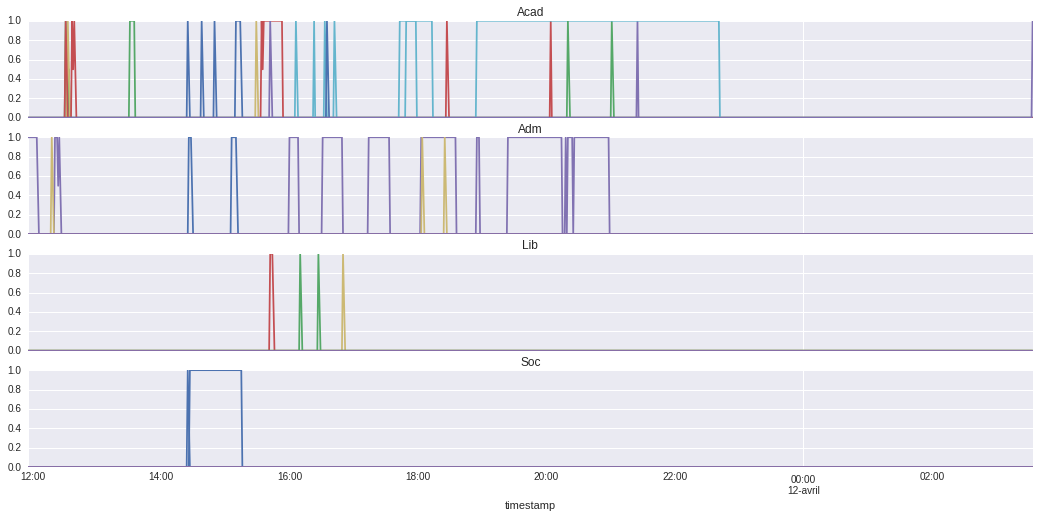

In [263]:
fig, axes = plt.subplots(nrows=4, ncols=1)
for i,b in enumerate(building_list):
    b.plot(ax=axes[i],figsize=(18,8), legend=False, kind='line', sharex=True)
    axes[i].set_title(bldg[i])
    
plt.show()

The signal is cleanest.

## Clustering the stations

Can we group the station accordingly to the time spend on the different buildings?

In [268]:
building_list[0].sum() / len(building_list[0]) * 100

003065343950     0.159744
004096daa8fe     0.745474
00306526784b     0.159744
0040961e58be     0.000000
004096342c16     0.159744
00022db6cc78     0.159744
00409664173d     0.585729
003065d55e08     0.159744
00409699915b     0.319489
00409649fe8d     0.106496
003065fc1494     0.159744
004096da8a8e     1.224707
004096a0b921     0.159744
003065e8f0ca     0.000000
003065708c70     0.106496
00409699dfba     0.000000
00601d9bf252     0.000000
0040962dc86b    27.635783
003065b40dda     0.159744
004096ff6784     0.159744
0040968cf0ea     2.076677
0030650c0321     0.159744
00601db0635a     0.000000
00409622cb2b     0.106496
004096d06bb2     0.159744
0030655b9345     0.000000
00409630cdc9     0.159744
00306506fde2     0.106496
dtype: float64

In [289]:
l = np.zeros([28,4])
for i,b in enumerate(bldg):
    l[:,i] = building_list[i].sum() / len(building_list[i]) * 100


In [290]:
time_spent_buildings = pd.DataFrame(l, index=building_list[0].columns, columns=bldg)

In [291]:
time_spent_buildings

,Acad,Adm,Lib,Soc
003065343950,0.159744,0.000000,0.000000,0.000000
004096daa8fe,0.745474,0.000000,0.000000,0.000000
00306526784b,0.159744,0.000000,0.000000,0.000000
0040961e58be,0.000000,19.542066,0.000000,0.000000
004096342c16,0.159744,0.159744,0.159744,0.000000
00022db6cc78,0.159744,0.000000,0.000000,0.000000
00409664173d,0.585729,0.585729,0.000000,0.159744
003065d55e08,0.159744,0.000000,0.000000,0.000000
00409699915b,0.319489,0.000000,0.372737,0.000000
00409649fe8d,0.106496,0.000000,0.000000,0.000000
